# Breast Cancer with Logistic Regression
In this project, I wanted to test different evaluation criteria on a model.

### Importing Libraries

In [72]:
import pandas as pd
import numbers as np
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

### Loading Dataset

In [47]:
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Creating a DataFrame from the Dataset

In [48]:
df = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df['target'] = dataset['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Train and test splitting

In [49]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=28)

### Normalazation

In [50]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Creating a Logistic Regression model

In [51]:
model = LogisticRegression(max_iter=8000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=8000)

### Presicting

In [52]:
prediction = model.predict(x_test)

### Evaluation metrics and their outputs

##### Accuracy

In [53]:
accuracy_score(prediction,y_test)

0.956140350877193

##### Recall

In [54]:
recall_score(prediction,y_test)

0.9857142857142858

##### Precision

In [55]:
precision_score(prediction,y_test,pos_label=1)

0.9452054794520548

In [56]:
precision_score(prediction,y_test,pos_label=0)

0.975609756097561

##### F1

In [57]:
f1_score(prediction,y_test,pos_label=1)

0.965034965034965

##### Confusion matrix

In [59]:
confusion_matrix(y_test,prediction,labels=[0,1])

array([[40,  1],
       [ 4, 69]])

##### Classificaton report

In [62]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.99      0.95      0.97        73

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



##### ROC 

In [69]:
fpr,tpr,thresholds = roc_curve(y_test,prediction)

In [70]:
tpr

array([0.        , 0.94520548, 1.        ])

In [71]:
fpr

array([0.        , 0.02439024, 1.        ])

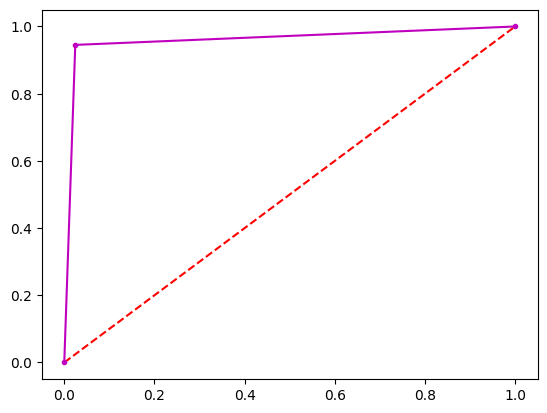

In [79]:
plt.plot([0,1],[0,1],linestyle='--',color='r')
plt.plot(fpr,tpr,marker='.',color='m')